### Evaluating the m5 limits ###

Create "table 2" and "figure 4", from the overview paper.

This uses fiducial construction numbers for the seeing and skybrightness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import syseng_throughputs as st

In [2]:
pd.set_option('display.precision', 3)

In [3]:
# Read bandpass information.
defaultDirs = st.setDefaultDirs()
addLosses = True
# Use the X=1.0 atmosphere!
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:67: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:67: UserWarning: Wavelength sampling of 800.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [4]:
# Standard LSST visits, standard LSST readnoise and 1 visit = 15s x 2exp
m5_std = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2)
m5_std

,nexp,exptime,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,2.0,15.0,0.92,0.808,22.991,64.018,26.814,0.030,0.047,0.495,0.038,22.994,0.659,0.427,23.692,531.870,23.9,23.4
g,2.0,15.0,0.87,0.767,22.264,423.326,28.417,0.131,0.160,0.215,0.039,24.451,0.172,0.091,24.847,803.955,25.0,24.6
r,2.0,15.0,0.83,0.734,21.199,844.831,28.192,0.106,0.120,0.127,0.039,24.466,0.093,0.046,24.381,1003.147,24.7,24.3
i,2.0,15.0,0.80,0.710,20.474,1248.344,27.921,0.083,0.091,0.096,0.039,24.377,0.065,0.031,23.969,1142.755,24.0,23.6
z,2.0,15.0,0.78,0.693,19.595,1890.565,27.519,0.057,0.061,0.069,0.039,24.213,0.044,0.020,23.393,1342.078,23.3,22.9
y,2.0,15.0,0.76,0.677,18.597,2410.428,26.685,0.027,0.031,0.169,0.039,23.756,0.035,0.016,22.465,1462.863,22.1,21.7


In [5]:
# Now also use X=1.2 atmosphere.
defaultDirs = st.setDefaultDirs()
addLosses = True
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)
# Calculate degraded seeing values (have to increase FWHM from default values)

# And calculate m5 for a standard visit. 
m5_X = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2, X=1.2)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:67: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/phot_utils/bandpass.py:67: UserWarning: Wavelength sampling of 800.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


In [6]:
# Add degradation of m5 when X=1.2 into m5_std columns (dCm_double for double visit time already there)
m5_std['m5_1.2'] = m5_X['m5']
m5_std['dM5_1.2'] = m5_std['m5'] - m5_X['m5']

In [7]:
cols = m5_std.columns
cols = ['skyMag', 'FWHMgeom', 'FWHMeff', 'gamma', 'kAtm', 'Cm', 'm5', 'dCm_infinity', 'dCm_double', 'dM5_1.2']
m5_std[cols].T

,u,g,r,i,z,y
skyMag,22.991,22.264,21.199,20.474,19.595,18.597
FWHMgeom,0.808,0.767,0.734,0.710,0.693,0.677
FWHMeff,0.920,0.870,0.830,0.800,0.780,0.760
gamma,0.038,0.039,0.039,0.039,0.039,0.039
kAtm,0.495,0.215,0.127,0.096,0.069,0.169
Cm,22.994,24.451,24.466,24.377,24.213,23.756
m5,23.692,24.847,24.381,23.969,23.393,22.465
dCm_infinity,0.659,0.172,0.093,0.065,0.044,0.035
dCm_double,0.427,0.091,0.046,0.031,0.020,0.016
dM5_1.2,0.214,0.160,0.142,0.133,0.130,0.140


In [8]:
print(m5_std[cols].T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & u & g & r & i & z & y \\
\midrule
skyMag & 22.990565 & 22.263735 & 21.199289 & 20.474239 & 19.595023 & 18.596712 \\
FWHMgeom & 0.808240 & 0.767140 & 0.734260 & 0.709600 & 0.693160 & 0.676720 \\
FWHMeff & 0.920000 & 0.870000 & 0.830000 & 0.800000 & 0.780000 & 0.760000 \\
gamma & 0.038120 & 0.038756 & 0.039003 & 0.039125 & 0.039255 & 0.039316 \\
kAtm & 0.494560 & 0.215218 & 0.126712 & 0.096044 & 0.069145 & 0.168572 \\
Cm & 22.993542 & 24.451160 & 24.466245 & 24.376858 & 24.212743 & 23.756149 \\
m5 & 23.692100 & 24.846974 & 24.380939 & 23.968998 & 23.392763 & 22.465216 \\
dCm_infinity & 0.659264 & 0.171867 & 0.093382 & 0.065057 & 0.043910 & 0.034768 \\
dCm_double & 0.426806 & 0.090540 & 0.046267 & 0.031100 & 0.020171 & 0.015528 \\
dM5_1.2 & 0.213665 & 0.159646 & 0.142200 & 0.133177 & 0.129955 & 0.139927 \\
\bottomrule
\end{tabular}



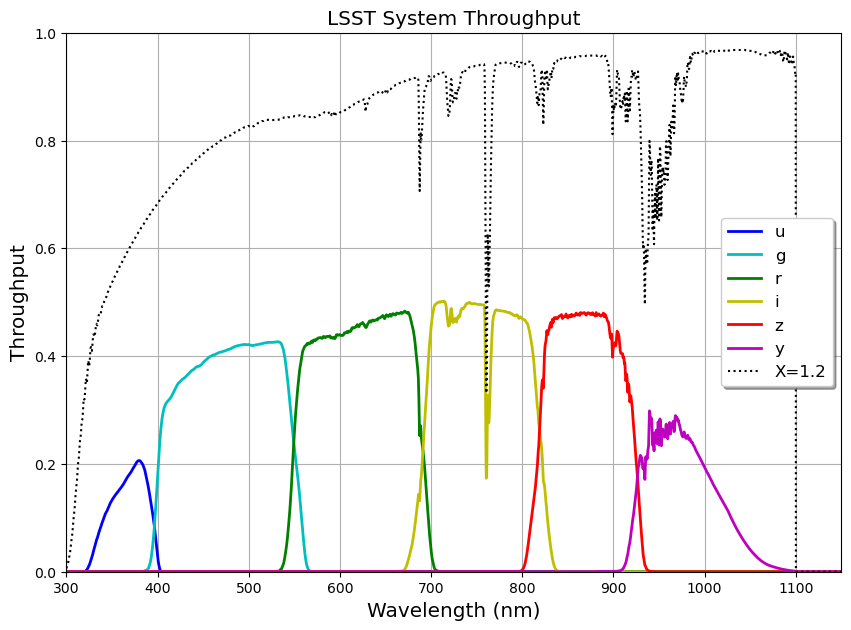

In [9]:
# Generate the plot for Figure 4, using X=1.2
plt.figure(figsize=(10, 7))
st.plotBandpasses(system, title='LSST System Throughput', addlegend=False, newfig=False)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'k:', label='X=1.2')
plt.ylabel("Throughput")
plt.legend(loc='right', numpoints=1, fancybox=True, shadow=True, fontsize='large')
#plt.savefig('Figure4.pdf', format='pdf')